#Python imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk

#datasource

In [9]:
# Load the data from the CSV file into a numpy array
data = pd.read_csv('raw_house_data.csv', header=None)

##Column names

In [19]:
# Rename the columns of the dataframe
data.columns = ['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 
                'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 
                'fireplaces', 'floor_covering', 'HOA']

In [20]:
# Print the shape of the data array to verify that it loaded correctly
print("Data shape:", data.shape)

Data shape: (5001, 16)


The Data_Shape: (5001, 16) output says that the data has a shape of 5001 rows and 16 columns.

What this means in we have 5001 data points and for 1 data point we have 16 features.

#The steps to preprocessing the data

Now the data is loaded in and we understand it's shape, it is time to understand preprocessing. Preprocessing a dataset refers to techniques and methods. The steps are:
- Cleaning the data
- handling missing values
- transforming data for increased suitability for modelling
- and either scaling or normalizing the data.

#Cleaning the data

we use the dropna() method to remove any rows with null values. The resulting DataFrame with null values removed is stored in data_clean. We use the drop_duplicates() method to get rid of any duplicate rows from the dataframe I stuck them together because I didn't want to unneccesarily have a different variable for clean and dropdupes.

```
# This is formatted as code
```



In [34]:
# Remove rows with any null values and drop duplicates
data_clean = data.dropna().drop_duplicates()

# Print the shape of the cleaned data
print("Cleaned Data shape:", data_clean.shape)

Cleaned Data shape: (4974, 16)


##visualization

With the header columns we should be capable of the following:

### Plot longitude and latitude

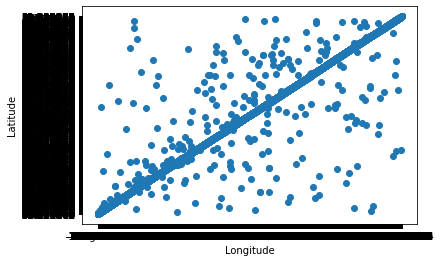

In [38]:
# Create a scatter plot of the longitude and latitude columns
plt.scatter(data_clean['longitude'], data_clean['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()